In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

In [2]:
donors= pd.read_csv('learningSet.csv')


C:\Users\adyto\AppData\Local\Temp\ipykernel_2696\3187719040.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  donors= pd.read_csv('learningSet.csv')


In [3]:
donors.head(10)

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
5,9401,CWR,0,AL,35603,,,0,0,,...,0.0,0,L,1,F,X,X,X,16.0,C
6,8701,DRK,0,IN,46755,,,6001,0,,...,0.0,1,L,1,E,X,X,X,53.0,D
7,9401,NWN,0,LA,70611,,,0,0,,...,0.0,1,L,3,E,X,X,X,38.0,C
8,8801,LIS,1,IA,51033,,,0,0,,...,0.0,1,L,1,F,X,X,X,57.0,D
9,9401,MSD,1,TN,37127-,,,3211,0,,...,0.0,0,L,1,F,X,X,X,34.0,B


In [4]:
nulls_percent_df = pd.DataFrame(donors.isna().sum()/len(donors)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [5]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
16,AGE,0.248030
23,NUMCHLD,0.870184
24,INCOME,0.223096
26,WEALTH1,0.468830
28,MBCRAFT,0.553955
...,...,...
455,RAMNT_24,0.814090
466,NEXTDATE,0.104526
467,TIMELAG,0.104526
479,CLUSTER2,0.001383


In [6]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.85]
columns_above_threshold

,column_name,nulls_percentage
23,NUMCHLD,0.870184
412,RDATE_3,0.997464
413,RDATE_4,0.997055
414,RDATE_5,0.999906
415,RDATE_6,0.991867
416,RDATE_7,0.906773
419,RDATE_10,0.890360
422,RDATE_13,0.871609
424,RDATE_15,0.923888
426,RDATE_17,0.901469


In [7]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['NUMCHLD', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_10', 'RDATE_13', 'RDATE_15', 'RDATE_17', 'RDATE_20', 'RDATE_21', 'RDATE_23', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_10', 'RAMNT_13', 'RAMNT_15', 'RAMNT_17', 'RAMNT_20', 'RAMNT_21', 'RAMNT_23']


In [8]:
drop_list=["OSOURCE","ZIP"]

In [9]:
drop_columns_list=drop_columns_list+drop_list

In [10]:
drop_columns_list

['NUMCHLD',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_10',
 'RDATE_13',
 'RDATE_15',
 'RDATE_17',
 'RDATE_20',
 'RDATE_21',
 'RDATE_23',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_10',
 'RAMNT_13',
 'RAMNT_15',
 'RAMNT_17',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_23',
 'OSOURCE',
 'ZIP']

In [11]:
donors=donors.drop(drop_columns_list, axis = 1)


In [12]:
donors = donors.apply(lambda x: x.replace(" ", np.NaN))


In [13]:
donors['MAILCODE'] = donors['MAILCODE'].fillna("A")


In [14]:
donors['MAILCODE'].value_counts()


A    94013
B     1399
Name: MAILCODE, dtype: int64

In [15]:
donors

,ODATEDW,TCODE,STATE,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,0,IL,A,NaN,3712,0,NaN,NaN,NaN,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,1,CA,A,NaN,5202,0,NaN,NaN,NaN,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,1,NC,A,NaN,0,0,NaN,NaN,NaN,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,0,CA,A,NaN,2801,0,NaN,NaN,NaN,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,0,FL,A,NaN,2001,0,X,X,NaN,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,AK,A,NaN,0,0,NaN,NaN,NaN,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,1,TX,A,NaN,5001,0,NaN,NaN,NaN,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,1,MI,A,NaN,3801,0,NaN,X,NaN,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,0,CA,A,NaN,4005,0,X,NaN,NaN,...,18.0,1,L,4,F,X,X,X,11.0,A


In [16]:
numerical = donors.select_dtypes(np.number)


In [17]:
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,NaN,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0.0,0.0,3.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0.0,0.0,1.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,0.0,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,1.0,0.0,9.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,0,NaN,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,7.0,9.0,1,0.0,0.0,1.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,0,NaN,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,7.0,NaN,0,NaN,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [18]:
nulls_percent_df = pd.DataFrame(donors.isna().sum()/len(donors)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,STATE,0.000000
3,MAILCODE,0.000000
4,PVASTATE,0.984719
...,...,...
449,MDMAUD_R,0.000000
450,MDMAUD_F,0.000000
451,MDMAUD_A,0.000000
452,CLUSTER2,0.001383


In [19]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.85]
columns_above_threshold

,column_name,nulls_percentage
4,PVASTATE,0.984719
7,RECINHSE,0.929747
8,RECP3,0.978860
9,RECPGVG,0.998805
10,RECSWEEP,0.983052
17,CHILD03,0.987989
18,CHILD07,0.983587
19,CHILD12,0.981019
20,CHILD18,0.970161
47,SOLP3,0.998113


In [20]:
numerical = donors.select_dtypes(np.number)


In [21]:
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,NaN,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0.0,0.0,3.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0.0,0.0,1.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,0.0,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,1.0,0.0,9.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,0,NaN,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,7.0,9.0,1,0.0,0.0,1.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,0,NaN,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,7.0,NaN,0,NaN,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [22]:
Y = [['TARGET_B']]


In [23]:

nulls_percent_df = pd.DataFrame(donors.isna().sum()/len(donors)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,STATE,0.000000
3,MAILCODE,0.000000
4,PVASTATE,0.984719
...,...,...
449,MDMAUD_R,0.000000
450,MDMAUD_F,0.000000
451,MDMAUD_A,0.000000
452,CLUSTER2,0.001383


In [24]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
4,PVASTATE,0.984719
6,NOEXCH,0.000073
7,RECINHSE,0.929747
8,RECP3,0.978860
9,RECPGVG,0.998805
...,...,...
428,RAMNT_24,0.814090
439,NEXTDATE,0.104526
440,TIMELAG,0.104526
452,CLUSTER2,0.001383


In [25]:
Y = donors[['TARGET_B']]


In [26]:
numerical = donors.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,NaN,NaN,NaN,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0.0,0.0,3.0,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0.0,0.0,1.0,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,0.0,0.0,0.0,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,1.0,0.0,9.0,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0


In [27]:
categorical = donors.select_dtypes(object)
categorical.head()

,STATE,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,IL,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,T2,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,CA,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,S1,...,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,NC,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,R2,...,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,CA,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,R2,...,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,FL,A,NaN,0,X,X,NaN,NaN,XXXX,S2,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [28]:
print(categorical['GENDER'].value_counts())

categorical.loc[categorical['GENDER'].isin([' '])] = 'F'
## changing [' ', 'U', 'J','C','A'] to others

categorical['GENDER'] = categorical['GENDER'].fillna('F')


## changing the space to F 

print(categorical['GENDER'].value_counts())

categorical.loc[categorical['GENDER'].isin(['U', 'J','C','A'])] = 'others'
## changing the rest of the values to others 


categorical['GENDER'].value_counts()
## checkup

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64
F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


F         54234
M         39094
others     2084
Name: GENDER, dtype: int64

In [29]:
nulls_percent_df = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,STATE,0.000000
1,MAILCODE,0.000000
2,PVASTATE,0.963202
3,NOEXCH,0.000073
4,RECINHSE,0.909246
...,...,...
67,RFA_2A,0.000000
68,MDMAUD_R,0.000000
69,MDMAUD_F,0.000000
70,MDMAUD_A,0.000000


In [30]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
2,PVASTATE,0.963202
3,NOEXCH,0.000073
4,RECINHSE,0.909246
5,RECP3,0.957511
6,RECPGVG,0.976984
...,...,...
62,RFA_21,0.362439
63,RFA_22,0.264589
64,RFA_23,0.578701
65,RFA_24,0.380916


In [31]:
categorical['GEOCODE2'].value_counts(dropna=False)


A         33701
B         27929
D         16218
C         15167
others     2084
NaN         313
Name: GEOCODE2, dtype: int64

In [32]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')


In [33]:
categorical["GEOCODE2"].value_counts()

A         34014
B         27929
D         16218
C         15167
others     2084
Name: GEOCODE2, dtype: int64

In [34]:
numerical['WEALTH1'].value_counts(dropna=False)


NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

C:\Users\adyto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


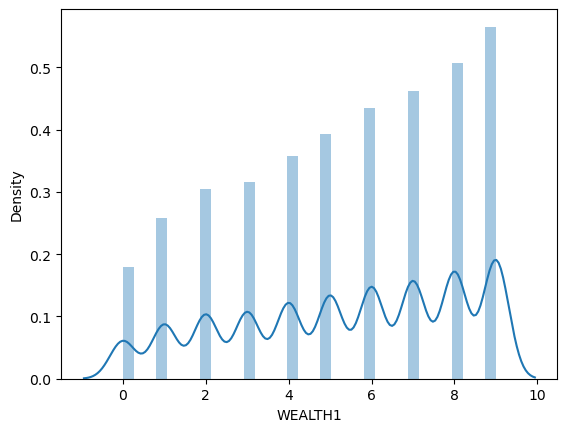

In [35]:
sns.distplot(numerical['WEALTH1'])
plt.show()

In [36]:
numerical['WEALTH1'].median()


6.0

In [37]:
#Replace NaN values by median value for WEALTH1 column
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(6.0)

In [38]:
numerical['ADI'].value_counts(dropna=False).unique()

array([7296, 4622, 3765, 2836, 2617, 2075, 2054, 1978, 1847, 1772, 1746,
       1717, 1676, 1651, 1647, 1588, 1573, 1472, 1305, 1193, 1127, 1075,
       1073, 1000,  996,  955,  924,  863,  843,  813,  807,  773,  745,
        696,  686,  669,  656,  645,  634,  613,  611,  602,  597,  585,
        582,  576,  573,  558,  554,  548,  542,  506,  501,  488,  472,
        422,  413,  412,  411,  409,  406,  393,  392,  388,  385,  366,
        365,  358,  356,  354,  348,  345,  337,  330,  327,  324,  320,
        319,  308,  305,  301,  292,  290,  288,  278,  274,  269,  267,
        263,  259,  257,  255,  253,  251,  250,  247,  246,  243,  240,
        239,  231,  230,  226,  223,  220,  217,  215,  211,  210,  205,
        197,  192,  185,  181,  175,  164,  163,  152,  146,  143,  142,
        141,  140,  138,  136,  132,  128,  126,  125,  122,  120,  119,
        118,  117,  116,  112,   99,   93,   91,   85,   83,   81,   78,
         73,   72,   71,   69,   68,   66,   64,   

In [39]:
numerical['ADI'].mode()


0    13.0
Name: ADI, dtype: float64

In [40]:
## changing the Nan to the most frequent as we cannot detemin with the amount of unique values 
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(13)

In [41]:
numerical['DMA'].value_counts(dropna=False)


803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

C:\Users\adyto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DMA', ylabel='Density'>

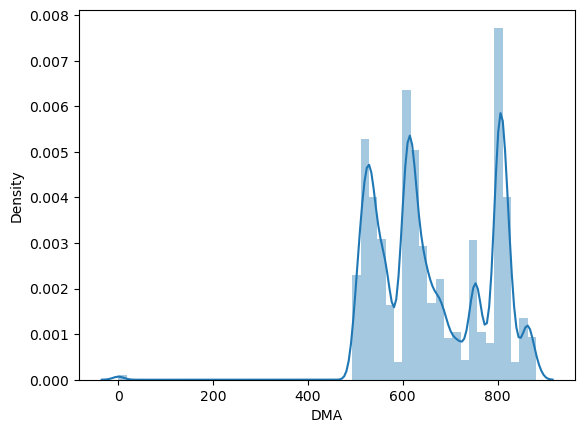

In [42]:
sns.distplot(numerical[numerical["DMA"].isna()==False]["DMA"]) 


In [43]:
numerical['DMA'].mode()



0    803.0
Name: DMA, dtype: float64

In [44]:
numerical['DMA'].mean()


664.0040722082284

In [45]:
numerical['DMA'] = numerical['DMA'].fillna(803)
## replacing nan value with freq value since by graph , it will shift the results a bit but seems better then mean 

C:\Users\adyto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


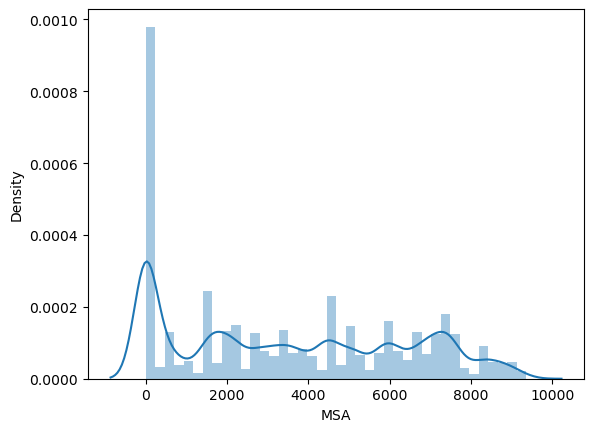

In [46]:
sns.distplot(numerical['MSA'])
plt.show()

In [47]:
numerical['MSA'] = numerical['MSA'].fillna(0)


In [48]:
numerical = numerical.apply(lambda x: x.replace(" ", np.NaN))


In [49]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))


In [50]:
numerical['TIMELAG']=numerical['TIMELAG'].fillna(6.0)

In [51]:
nulls_percent_df = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.000000
4,INCOME,0.223096
...,...,...
375,AVGGIFT,0.000000
376,CONTROLN,0.000000
377,HPHONE_D,0.000000
378,RFA_2F,0.000000


In [52]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
4,INCOME,0.223096
7,MBCRAFT,0.553955
8,MBGARDEN,0.553955
9,MBBOOKS,0.553955
10,MBCOLECT,0.554584
...,...,...
360,RAMNT_19,0.833595
361,RAMNT_22,0.781233
362,RAMNT_24,0.814090
373,NEXTDATE,0.104526


In [53]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40') # 'other' would also be a valid choice

In [54]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('U') # assumption: NAN also means 'we don't know'

In [55]:
# We will keep the column RFA_2X. We will delete rest of the columns 

for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name) 

In [56]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
drop_list.remove('ZIP')
drop_list.remove('OSOURCE')


In [57]:
drop_list

['RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24']

In [58]:
numerical['INCOME'] = numerical['INCOME'].fillna(5.0) # Replacing the null values with the most represented category


In [59]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

In [60]:
drop_columns_list

['NUMCHLD',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_10',
 'RDATE_13',
 'RDATE_15',
 'RDATE_17',
 'RDATE_20',
 'RDATE_21',
 'RDATE_23',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_10',
 'RAMNT_13',
 'RAMNT_15',
 'RAMNT_17',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_23',
 'OSOURCE',
 'ZIP']

In [61]:
cleannum=numerical.dropna(axis=1)
cleannum

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,6.0,0,0,39,34,...,9402,10.0,9512,8911,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,9512,25.0,9512,9310,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,9207,5.0,9512,9001,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,9411,10.0,9512,8702,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,9601,15.0,9601,7903,14.0,6.864865,7112,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,61.611649,5.0,6.0,0,14,36,47,...,9602,25.0,9602,9602,6.0,25.000000,184568,0,1,12.0
95408,9601,1,5001,48.000000,7.0,9.0,1,0,31,43,...,9603,20.0,9603,9603,6.0,20.000000,122706,1,1,2.0
95409,9501,1,3801,60.000000,5.0,6.0,0,0,18,46,...,9501,10.0,9610,9410,3.0,8.285714,189641,1,3,34.0
95410,8601,0,4005,58.000000,7.0,6.0,0,0,28,35,...,9608,18.0,9701,8612,4.0,12.146341,4693,1,4,11.0


In [62]:
drop_list = []
for col_name in cleannum.columns:
    if "HC" in col_name:
        drop_list.append(col_name)
    elif 'MB' in col_name:
        drop_list.append(col_name)
    elif 'MAG' in col_name:
        drop_list.append(col_name)
    elif 'PUB' in col_name:
        drop_list.append(col_name)

drop_list

['ETHC1',
 'ETHC2',
 'ETHC3',
 'ETHC4',
 'ETHC5',
 'ETHC6',
 'HC1',
 'HC2',
 'HC3',
 'HC4',
 'HC5',
 'HC6',
 'HC7',
 'HC8',
 'HC9',
 'HC10',
 'HC11',
 'HC12',
 'HC13',
 'HC14',
 'HC15',
 'HC16',
 'HC17',
 'HC18',
 'HC19',
 'HC20',
 'HC21']

In [63]:
dropl=["LOCALGOV","STATEGOV","FEDGOV"]+drop_list

In [64]:
cleannum.drop(dropl, inplace=True, axis=1)


C:\Users\adyto\AppData\Local\Temp\ipykernel_2696\3534747197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleannum.drop(dropl, inplace=True, axis=1)


In [65]:
cleancategorical=categorical.dropna(axis=1)


In [66]:
cleancategorical

,STATE,MAILCODE,MDMAUD,CLUSTER,HOMEOWNR,GENDER,RFA_2,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,IL,A,XXXX,36,U,F,L4E,L,E,X,X,X,C
1,CA,A,XXXX,14,H,M,L2G,L,G,X,X,X,A
2,NC,A,XXXX,43,U,M,L4E,L,E,X,X,X,C
3,CA,A,XXXX,44,U,F,L4E,L,E,X,X,X,C
4,FL,A,XXXX,16,H,F,L2F,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,AK,A,XXXX,27,U,M,L1G,L,G,X,X,X,C
95408,TX,A,XXXX,24,H,M,L1F,L,F,X,X,X,A
95409,MI,A,XXXX,30,U,M,L3E,L,E,X,X,X,B
95410,CA,A,XXXX,24,H,F,L4F,L,F,X,X,X,A


In [67]:
dropl=["RFA_2","MDMAUD","CLUSTER"]

In [68]:
cleancategorical.drop(dropl, inplace=True, axis=1)


C:\Users\adyto\AppData\Local\Temp\ipykernel_2696\2166302992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleancategorical.drop(dropl, inplace=True, axis=1)


In [69]:
Y

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


In [70]:
all_data = pd.concat([cleannum,cleancategorical],axis=1)


In [71]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data, Y, random_state=2) # default fraction is .2

X_train.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,STATE,MAILCODE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
39738,9501,2,4001,58.000000,7.0,9.0,2,1,41,29,...,AL,A,H,F,L,F,X,X,X,B
16561,9101,0,0,61.611649,2.0,6.0,1,0,32,21,...,others,others,others,others,others,others,others,others,others,others
84411,8601,0,1208,85.000000,5.0,6.0,0,0,21,32,...,TX,A,U,F,L,E,X,X,X,A
31606,9501,28,5801,40.000000,4.0,6.0,0,1,36,35,...,TX,A,U,F,L,G,X,X,X,C
40865,8701,28,2006,78.000000,5.0,6.0,0,0,31,46,...,MN,A,U,F,L,E,X,X,X,A


In [72]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

In [73]:
#Usage of MinMax Scaler
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=list(X_train_num.columns))
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=list(X_test_num.columns))

In [74]:
##Encode the categorical features using One-Hot Encoding or Ordinal Encoding. (train_cat, test_cat)
#Usage of One-Hot Encoding

encoder = OneHotEncoder(drop='first').fit(X_train_cat)
all_columns = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns=all_columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns=all_columns)


In [75]:
##again concatenate the scaled data

X_train = pd.concat((X_train_num_scaled,X_train_cat_encode),axis=1)
X_test = pd.concat((X_test_num_scaled,X_test_cat_encode),axis=1)

In [76]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 
model = LogisticRegression(solver='lbfgs',
                  multi_class='auto', max_iter = 1000).fit(X_train, y_train)

C:\Users\adyto\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
predictions = model.predict(X_test)


In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

## as we see the model is predicting TP 22672 and fp  1181 while 0 tn and 0 fn , somewhat imbalanced and need to continue trying to change the data 

array([[22672,     0],
       [ 1181,     0]], dtype=int64)

In [79]:
display(model.score(X_train, y_train))
display(model.score(X_test, y_test))

0.9488254447379085

0.9504884081666877

In [82]:

##checking for imbalance 

Y.value_counts()


TARGET_B
0           90569
1            4843
dtype: int64

In [83]:
# oversampling / undersampling can only to be done on the TRAINING set
train_set = pd.concat([X_train, y_train],axis=1)
train_set.head(10)

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,MDMAUD_A_others,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,GEOCODE2_others,TARGET_B
0,0.856631,0.000028,0.412049,0.587629,1.000000,1.000000,0.008299,0.010204,0.414141,0.292929,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1,0.569892,0.000000,0.000000,0.624862,0.166667,0.666667,0.004149,0.000000,0.323232,0.212121,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,0.211470,0.000000,0.124408,0.865979,0.666667,0.666667,0.000000,0.000000,0.212121,0.323232,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.856631,0.000389,0.597425,0.402062,0.500000,0.666667,0.000000,0.010204,0.363636,0.353535,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,0.283154,0.000389,0.206591,0.793814,0.666667,0.666667,0.000000,0.000000,0.313131,0.464646,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
5,0.498208,0.000000,0.556231,0.443299,0.500000,0.777778,0.004149,0.000000,0.282828,0.373737,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
6,0.641577,0.000389,0.711123,0.288660,0.166667,0.777778,0.004149,0.000000,0.343434,0.515152,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
7,0.211470,0.000000,0.145417,0.845361,0.666667,0.666667,0.000000,0.000000,0.191919,0.181818,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
8,0.856631,0.000000,0.782801,0.216495,0.500000,0.666667,0.000000,0.000000,0.373737,0.343434,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
9,0.426523,0.000028,0.000000,0.624862,0.166667,0.666667,0.000000,0.000000,0.292929,0.202020,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [84]:
# separate majority/minority classes
category_0 = train_set[train_set['TARGET_B'] == 0]
category_1 = train_set[train_set['TARGET_B'] == 1]

In [ ]:
## DOWNSAMPLING

In [85]:
from sklearn.utils import resample


In [87]:
category_0_undersampled = resample(category_0, 
                                   replace=True, 
                                   n_samples = len(category_1))

In [89]:
## show shape

print(category_0_undersampled.shape)
print(category_1.shape)

(3662, 378)
(3662, 378)


In [90]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)


In [91]:
data_downsampled['TARGET_B'].value_counts()


0    3662
1    3662
Name: TARGET_B, dtype: int64

In [93]:
X_train_under = data_downsampled.drop(['TARGET_B'], axis=1)
y_train_under = data_downsampled['TARGET_B']

In [94]:

model_under = LogisticRegression(solver='lbfgs',
                  multi_class='auto', max_iter = 1000).fit(X_train_under, y_train_under)

In [95]:
predictions_under = model_under.predict(X_test)


In [96]:
confusion_matrix(y_test, predictions_under)


array([[13357,  9315],
       [  515,   666]], dtype=int64)

In [97]:
display(model.score(X_train_under, y_train_under))
display(model.score(X_test, y_test))

0.5

0.9504884081666877

In [98]:
print("precision: ",precision_score(y_test,predictions_under, average='binary', pos_label = 1, labels=[1, 0]))
print("recall: ",recall_score(y_test,predictions_under, average='binary', pos_label = 1, labels=[1, 0]))
print("f1: ",f1_score(y_test,predictions_under, average='binary', pos_label = 1, labels=[1, 0]))



precision:  0.06672678088367899
recall:  0.5639288738357324
f1:  0.11933345278623904


In [99]:
## understampling was not a good idea as out model score got worse 

In [100]:
# oversample minority
category_1_oversampled = resample(category_1, 
                                    replace=True,            
                                    n_samples = len(category_0))  

In [101]:
data_oversampled = pd.concat([category_1_oversampled, category_0], axis=0)


In [102]:
X_train_over = data_oversampled.drop(['TARGET_B'], axis=1)
y_train_over = data_oversampled['TARGET_B']

In [103]:
model_over = LogisticRegression(solver='lbfgs',
                  multi_class='auto', max_iter = 10000).fit(X_train_over, y_train_over)

In [104]:
predictions_over = model_over.predict(X_test)


In [105]:
confusion_matrix(y_test, predictions_over)


array([[14067,  8605],
       [  569,   612]], dtype=int64)

In [106]:
display(model.score(X_train_over, y_train_over))
display(model.score(X_test, y_test))

0.5

0.9504884081666877

In [ ]:
## oversampling has the same score therefor will use the first model 